<a href="https://colab.research.google.com/github/Rajeeb321123/Pytorch/blob/master/02_classification_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Classification

https://playground.tensorflow.org/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

PyTorch training loop steps:

 - Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).

- Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

- Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

- Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).

- Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
noise = 0.03
random_state = 42

X, y = make_circles(n_samples=n_samples, noise=noise, random_state=random_state)
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
circles = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "label": y})
circles

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


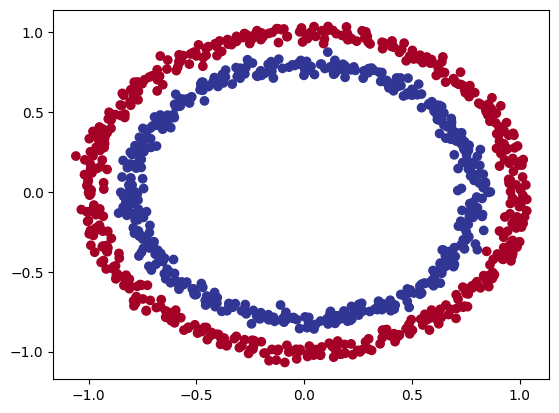

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape, X.dtype, y.dtype, len(X), len(y)

((1000, 2), (1000,), dtype('float64'), dtype('int64'), 1000, 1000)

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

X_train[:10], len(X_train), len(X_test), len(y_train), len(y_test)

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994],
         [-0.8837, -0.4678],
         [-0.3836,  0.6987],
         [ 0.6047,  0.5163],
         [-0.5869,  0.7804],
         [ 0.8833, -0.5178]]),
 800,
 200,
 800,
 200)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

### Binary Classification

#### model _1 without non linearity (no activation function)

In [ ]:
torch.manual_seed(42)
input_dim = X_train.shape[1]
# Create

# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# )

# model_0
class model_0(torch.nn.Module):
    def __init__(self):
        super(model_0, self).__init__()
        self.linear_1 = nn.Linear(input_dim,5)
        self.linear_2= nn.Linear(5,1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.linear_1(x)
        x = self.linear_2(x)

        # the Binary Cross Entropy (BCE) loss function typically requires a sigmoid activation function. The sigmoid function squashes the output of the model to a range between 0 and 1, which is necessary for BCE to interpret the output as probabilities.
        return x

model_0 = model_0()


In [ ]:
# Compile
# loss_function = nn.BCELoss()
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model_0.parameters(), lr = 0.1)


In [ ]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test)[:5]
print("y_logits:", y_logits)
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
print("y_pred_probs:", y_pred_probs)

# Find the predicted labels
y_preds = torch.round(y_pred_probs)
print("y_pred:", y_preds)

y_preds = y_preds.squeeze()
print("y_preds:", y_preds)

print(torch.unique(y_preds))

y_logits: tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], grad_fn=<SliceBackward0>)
y_pred_probs: tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], grad_fn=<SigmoidBackward0>)
y_pred: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)
y_preds: tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)
tensor([0.], grad_fn=<Unique2Backward0>)


In [ ]:

# Fit
epochs = 100
## Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
test_acc_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # # 2. Calculate loss/accuracy
    # loss = loss_function(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_function(y_logits, y_train) # Using nn.BCEWithLogitsLoss works with raw logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
# 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_function(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)


    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach())
        test_loss_values.append(test_loss.detach())
        test_acc_values.append(test_acc)
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69721, Test acc: 50.00%
Epoch: 10 | Loss: 0.69403, Accuracy: 50.00% | Test loss: 0.69615, Test acc: 50.00%
Epoch: 20 | Loss: 0.69343, Accuracy: 46.00% | Test loss: 0.69585, Test acc: 48.50%
Epoch: 30 | Loss: 0.69321, Accuracy: 49.00% | Test loss: 0.69577, Test acc: 47.50%
Epoch: 40 | Loss: 0.69312, Accuracy: 49.50% | Test loss: 0.69573, Test acc: 46.50%
Epoch: 50 | Loss: 0.69308, Accuracy: 50.38% | Test loss: 0.69569, Test acc: 46.50%
Epoch: 60 | Loss: 0.69306, Accuracy: 50.50% | Test loss: 0.69564, Test acc: 46.50%
Epoch: 70 | Loss: 0.69305, Accuracy: 50.50% | Test loss: 0.69559, Test acc: 46.50%
Epoch: 80 | Loss: 0.69304, Accuracy: 50.75% | Test loss: 0.69553, Test acc: 46.50%
Epoch: 90 | Loss: 0.69303, Accuracy: 50.38% | Test loss: 0.69547, Test acc: 46.50%


In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

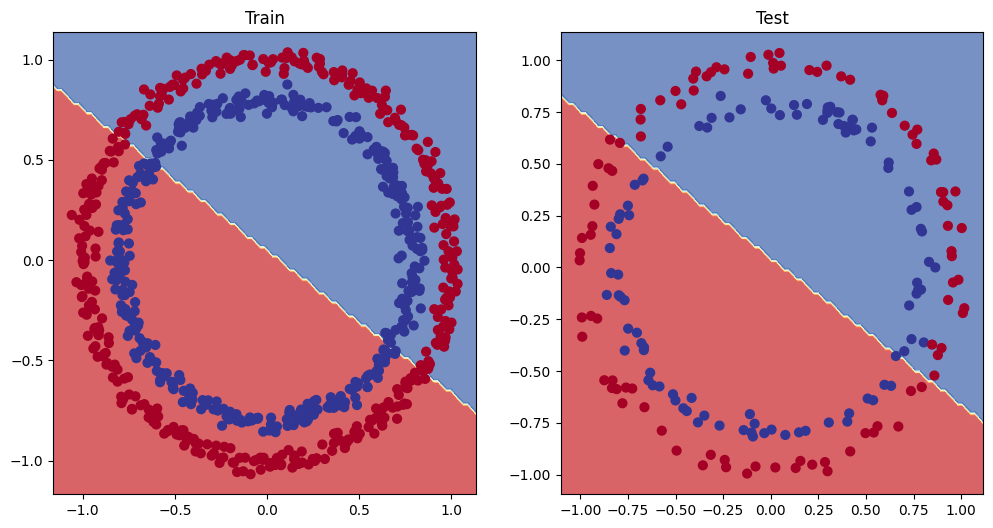

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#### model_2 with non linearity (using ReLu for input and hidden layer or Sigmoid for output layer) and Adam(0.001)

In [ ]:
torch.manual_seed(42)
input_dim = X_train.shape[1]

# Adding relu and sigmoid is added in next code cell
class model_1(torch.nn.Module):
    def __init__(self):
        super(model_1, self).__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # the Binary Cross Entropy (BCE) loss function typically requires a sigmoid activation function. The sigmoid function squashes the output of the model to a range between 0 and 1, which is necessary for BCE to interpret the output as probabilities.
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_1 = model_1()
# Compile
# loss_function = nn.BCELoss()
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

In [ ]:
# Fit
# Fit the model
torch.manual_seed(42)
epochs = 1000
train_loss_values = []
test_loss_values = []
test_acc_values = []
epoch_count = []

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0 or epoch + 1 == epochs:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach())
        test_loss_values.append(test_loss.detach())
        test_acc_values.append(test_acc)
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69310, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68481, Accuracy: 52.88% | Test Loss: 0.68289, Test Accuracy: 57.00%
Epoch: 200 | Loss: 0.66289, Accuracy: 64.50% | Test Loss: 0.65978, Test Accuracy: 65.00%
Epoch: 300 | Loss: 0.60675, Accuracy: 78.38% | Test Loss: 0.60703, Test Accuracy: 76.50%
Epoch: 400 | Loss: 0.50024, Accuracy: 95.12% | Test Loss: 0.51360, Test Accuracy: 94.00%
Epoch: 500 | Loss: 0.38035, Accuracy: 98.88% | Test Loss: 0.40550, Test Accuracy: 98.50%
Epoch: 600 | Loss: 0.26408, Accuracy: 99.75% | Test Loss: 0.29234, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.18558, Accuracy: 99.62% | Test Loss: 0.21730, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.13569, Accuracy: 99.75% | Test Loss: 0.16587, Test Accuracy: 99.00%
Epoch: 900 | Loss: 0.10229, Accuracy: 99.88% | Test Loss: 0.13124, Test Accuracy: 99.50%
Epoch: 999 | Loss: 0.08023, Accuracy: 99.88% | Test Loss: 0.10625, Test Accuracy: 100.00%


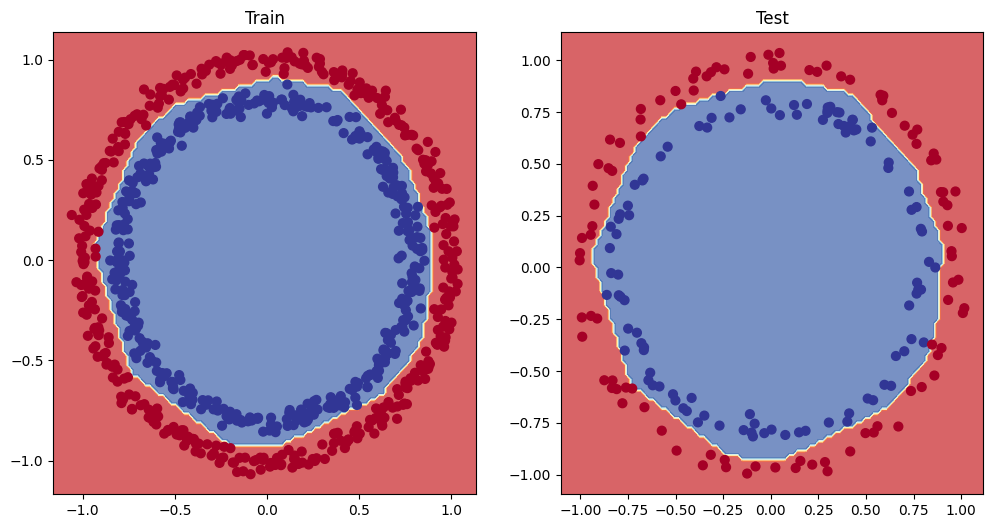

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

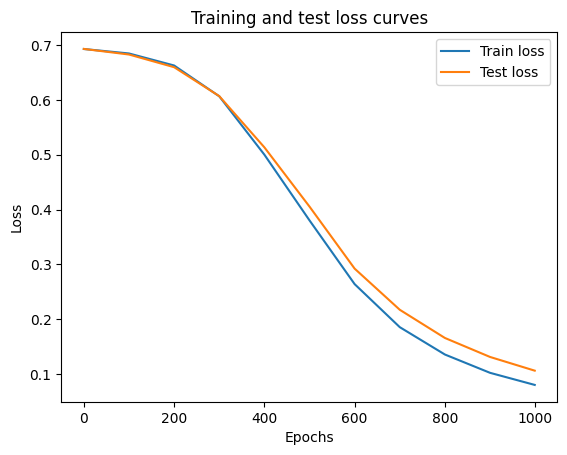

In [ ]:
# Plot the loss curves if cpu used
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

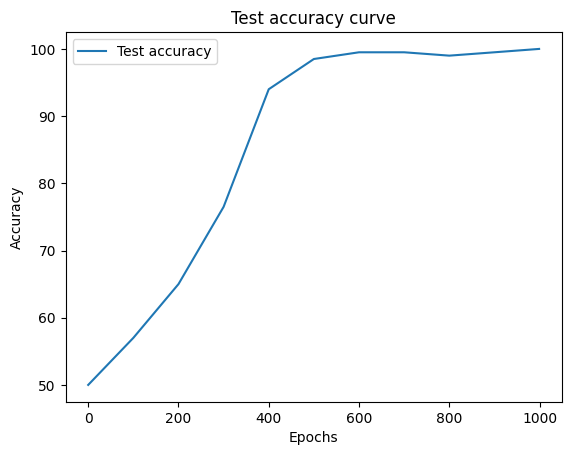

In [ ]:
plt.plot(epoch_count, test_acc_values, label="Test accuracy")
plt.title("Test accuracy curve")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

### MultiClass Classification

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn, optim
import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


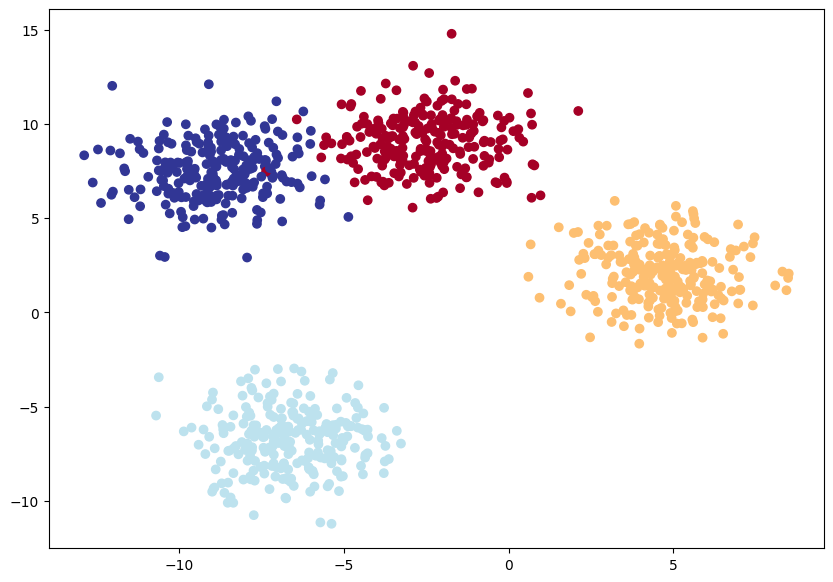

In [ ]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
X_blob_train.shape

torch.Size([800, 2])

In [ ]:
X_blob_train, y_blob_train

(tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         ...,
         [-1.7366,  9.7850],
         [-6.8139, -7.1006],
         [-9.0311,  4.5007]]),
 tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1,
         3, 2, 3, 0, 1, 0, 0, 1, 1, 3, 0, 2, 2, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, 0,
         1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 3, 1, 0, 2, 1, 3, 2, 2, 2, 1, 0, 2,
         3, 1, 1, 1, 2, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1,
         3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 2, 3, 1, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3, 2,
         0, 0, 2, 2, 0, 1, 2, 0, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2,
         3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 0, 2, 0, 1,
         2, 2, 2, 3, 0, 1, 1, 0, 1, 2, 0, 3, 2, 1, 3, 2, 3, 0, 3, 1, 1, 2, 2, 2,
         2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 3, 1, 0, 0, 1, 3, 0, 1, 3, 3, 2, 3, 3, 3,
         1, 0, 0, 1, 0, 3, 2, 1, 0, 3, 0, 0, 3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2,


### model_3 multiclass classifcation blob model using RelU

In [ ]:
class blobModel(nn.Module):
    def __init__(self, input_features, output_feature, hidden_units=8):
        super(blobModel, self).__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # this data doesnot require relu at all because classification can be done with straight linear
            # nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_feature),
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

model_3 = blobModel(input_features=2, output_feature=4, hidden_units=8)

# compile
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_3.parameters(), lr=0.1)

model_3

blobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
model_3(X_blob_train.to(device))[:5]

tensor([[-1.9340, -0.1204,  0.9904, -1.2652],
        [-0.3854, -1.0733,  2.2808, -1.1538],
        [-0.0923,  0.1780, -0.1166,  0.1850],
        [-0.1821,  0.1595, -0.0522,  0.0862],
        [-0.3802, -0.7154,  1.6110, -0.8523]], grad_fn=<SliceBackward0>)

In [ ]:
y_logits = model_3(X_blob_train.to(device))[:5]
y_pred_probs = torch.softmax(y_logits, dim=1)# probablities for each 4 label for each data
y_pred_probs
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0]), torch.sum(y_pred_probs, dim = 1)

(tensor(1., grad_fn=<SumBackward0>),
 tensor([1., 1., 1., 1., 1.], grad_fn=<SumBackward1>))

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred_probs

tensor([2, 2, 3, 1, 2])

In [ ]:
# fit or train loop
torch.manual_seed(42)
epochs = 100


X_train, y_train = X_blob_train.to(device), y_blob_train.to(device)
X_test, y_test = X_blob_test.to(device), y_blob_test.to(device)

train_loss_values = []
test_loss_values = []
test_acc_values = []
epoch_count = []

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train)
    y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_train) # we use y_logits here because CrossEntropyloss uses softmax internally. os we need raw model output
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred_probs)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test)
        test_pred_probs = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred_probs)

        # Print out what's happening
    if epoch % 10 == 0 or epoch + 1 == epochs:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach())
        test_loss_values.append(test_loss.detach())
        test_acc_values.append(test_acc)
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.99592, Accuracy: 7.50% | Test Loss: 1.03713, Test Accuracy: 44.50%
Epoch: 10 | Loss: 0.36017, Accuracy: 98.62% | Test Loss: 0.32917, Test Accuracy: 99.00%
Epoch: 20 | Loss: 0.13743, Accuracy: 98.75% | Test Loss: 0.13199, Test Accuracy: 99.00%
Epoch: 30 | Loss: 0.08865, Accuracy: 99.12% | Test Loss: 0.08481, Test Accuracy: 99.00%
Epoch: 40 | Loss: 0.06810, Accuracy: 99.12% | Test Loss: 0.06410, Test Accuracy: 99.00%
Epoch: 50 | Loss: 0.05698, Accuracy: 99.12% | Test Loss: 0.05255, Test Accuracy: 99.00%
Epoch: 60 | Loss: 0.05008, Accuracy: 99.12% | Test Loss: 0.04522, Test Accuracy: 99.00%
Epoch: 70 | Loss: 0.04542, Accuracy: 99.12% | Test Loss: 0.04016, Test Accuracy: 99.00%
Epoch: 80 | Loss: 0.04209, Accuracy: 99.12% | Test Loss: 0.03646, Test Accuracy: 99.50%
Epoch: 90 | Loss: 0.03959, Accuracy: 99.12% | Test Loss: 0.03363, Test Accuracy: 99.50%
Epoch: 99 | Loss: 0.03782, Accuracy: 99.12% | Test Loss: 0.03160, Test Accuracy: 99.50%


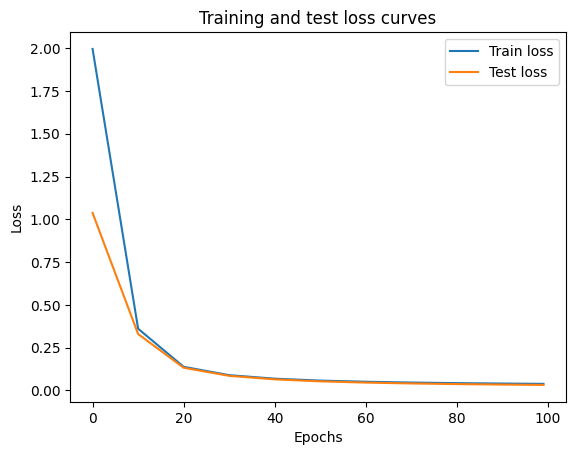

In [ ]:
# Plot the loss curves if gpu used
plt.plot(epoch_count,
         [t.cpu().numpy() for t in train_loss_values],
         label="Train loss")
plt.plot(epoch_count,
         [t.cpu().numpy() for t in test_loss_values],
         label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

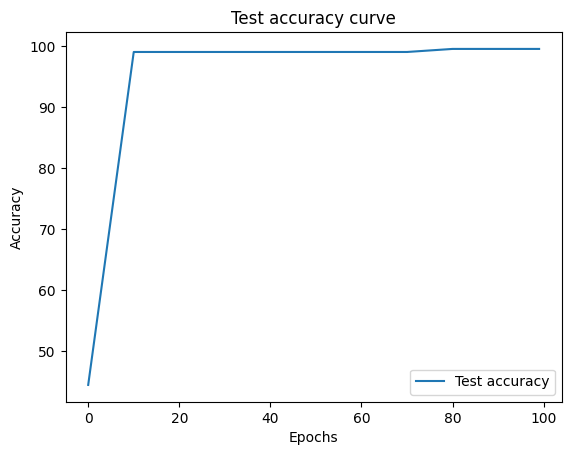

In [ ]:
plt.plot(epoch_count, test_acc_values, label="Test accuracy")
plt.title("Test accuracy curve")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_logits = model_3(X_blob_test)

# View the first 10 predictions
y_logits[:10]

# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


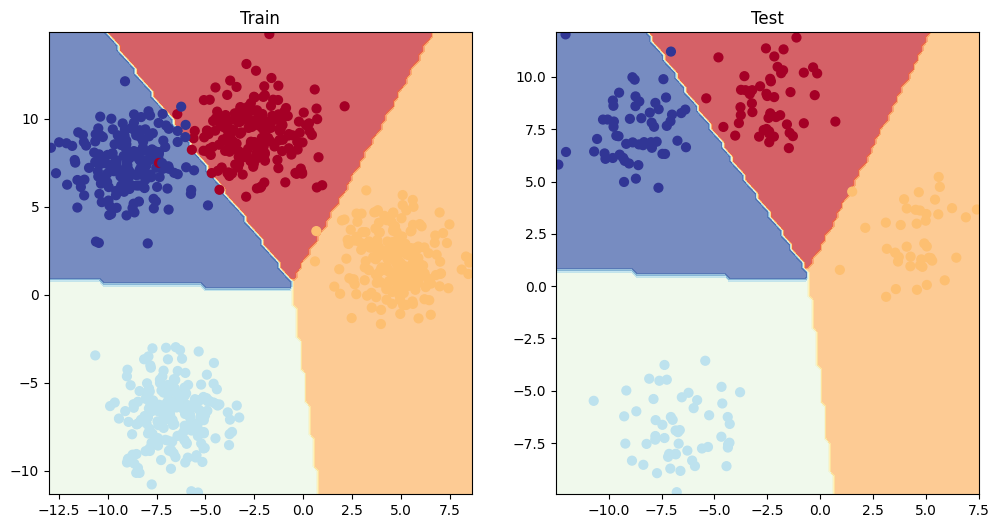

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_blob_test, y_blob_test)

### model_4 multiclass classification with tanh activation function

In [ ]:
class blobModel(nn.Module):
    def __init__(self, input_features, output_feature, hidden_units=8):
        super(blobModel, self).__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Tanh(), # this data doesnot require relu at all because classification can be done with straight linear line
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Tanh(),
            nn.Linear(in_features=hidden_units, out_features=output_feature),
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

model_4 = blobModel(input_features=2, output_feature=4, hidden_units=8)

# compile
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_4.parameters(), lr=0.1)

model_4

blobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Tanh()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Tanh()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
model_4(X_blob_train.to(device))[:5]

tensor([[-3.2254e-01,  4.3548e-04,  2.2600e-01,  8.8676e-02],
        [-6.4189e-01,  3.7570e-01,  2.3147e-01,  1.4337e-01],
        [-6.7789e-02,  3.4444e-02, -5.1761e-02,  3.0337e-01],
        [-1.1988e-01,  1.7594e-01, -1.6477e-01,  4.1219e-01],
        [-6.3517e-01,  3.6315e-01,  2.3761e-01,  1.5061e-01]],
       grad_fn=<SliceBackward0>)

In [ ]:
y_logits = model_4(X_blob_train.to(device))[:5]
y_pred_probs = torch.softmax(y_logits, dim=1)# probablities for each 4 label for each data
print(y_pred_probs)
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0]), torch.sum(y_pred_probs, dim = 1)

tensor([[0.1779, 0.2457, 0.3079, 0.2684],
        [0.1197, 0.3311, 0.2867, 0.2625],
        [0.2187, 0.2422, 0.2222, 0.3169],
        [0.1999, 0.2687, 0.1911, 0.3403],
        [0.1205, 0.3269, 0.2883, 0.2643]], grad_fn=<SoftmaxBackward0>)


(tensor(1.0000, grad_fn=<SumBackward0>),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>))

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred_probs

tensor([2, 1, 3, 3, 1])

In [ ]:
# fit or train loop
torch.manual_seed(42)
epochs = 100


X_train, y_train = X_blob_train.to(device), y_blob_train.to(device)
X_test, y_test = X_blob_test.to(device), y_blob_test.to(device)

train_loss_values = []
test_loss_values = []
test_acc_values = []
epoch_count = []

for epoch in range(epochs):
    model_4.train()
    y_logits = model_4(X_train)
    y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_train) # we use y_logits here because CrossEntropyloss uses softmax internally. os we need raw model output
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred_probs)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_test)
        test_pred_probs = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred_probs)

        # Print out what's happening
    if epoch % 10 == 0 or epoch + 1 == epochs:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach())
        test_loss_values.append(test_loss.detach())
        test_acc_values.append(test_acc)
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.61335, Accuracy: 1.88% | Test Loss: 1.50696, Test Accuracy: 10.50%
Epoch: 10 | Loss: 0.98737, Accuracy: 74.62% | Test Loss: 0.94466, Test Accuracy: 75.50%
Epoch: 20 | Loss: 0.72731, Accuracy: 86.25% | Test Loss: 0.70505, Test Accuracy: 89.00%
Epoch: 30 | Loss: 0.56393, Accuracy: 97.38% | Test Loss: 0.55141, Test Accuracy: 98.00%
Epoch: 40 | Loss: 0.44191, Accuracy: 98.75% | Test Loss: 0.43458, Test Accuracy: 99.00%
Epoch: 50 | Loss: 0.34583, Accuracy: 99.00% | Test Loss: 0.33948, Test Accuracy: 99.00%
Epoch: 60 | Loss: 0.27437, Accuracy: 99.00% | Test Loss: 0.26819, Test Accuracy: 99.00%
Epoch: 70 | Loss: 0.22464, Accuracy: 98.88% | Test Loss: 0.21856, Test Accuracy: 99.00%
Epoch: 80 | Loss: 0.18868, Accuracy: 98.88% | Test Loss: 0.18249, Test Accuracy: 99.00%
Epoch: 90 | Loss: 0.16158, Accuracy: 98.88% | Test Loss: 0.15526, Test Accuracy: 99.00%
Epoch: 99 | Loss: 0.14248, Accuracy: 98.88% | Test Loss: 0.13605, Test Accuracy: 99.00%


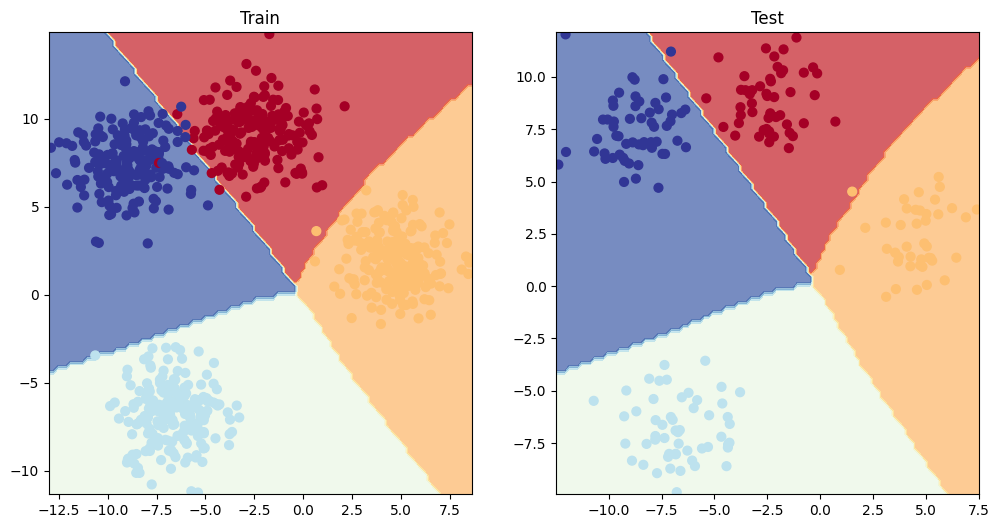

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
# tanh provide curve

In [ ]:
train_loss_values

[tensor(1.6133),
 tensor(0.9874),
 tensor(0.7273),
 tensor(0.5639),
 tensor(0.4419),
 tensor(0.3458),
 tensor(0.2744),
 tensor(0.2246),
 tensor(0.1887),
 tensor(0.1616),
 tensor(0.1425)]

## 9. More classification evaluation metrics

So far we've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

These are some of the most common methods you'll come across and are a good starting point.

However, you may want to evaluate your classification model using more metrics such as the following:

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3) or [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4) or [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5) or [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score) or [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix) or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Scikit-Learn (a popular and world-class machine learning library) has many implementations of the above metrics and you're looking for a PyTorch-like version, check out [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/), especially the [TorchMetrics classification section](https://torchmetrics.readthedocs.io/en/stable/pages/classification.html).

Let's try the `torchmetrics.Accuracy` metric out.




In [ ]:
try:
    from torchmetrics import Accuracy
except:
    %%capture
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

In [ ]:

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)

## Large multiclass classification

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn, optim
import numpy as np
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
train_data[0], train_data[0].shape

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [ ]:
print(len(test_data), len(test_labels))

10000 10000


2


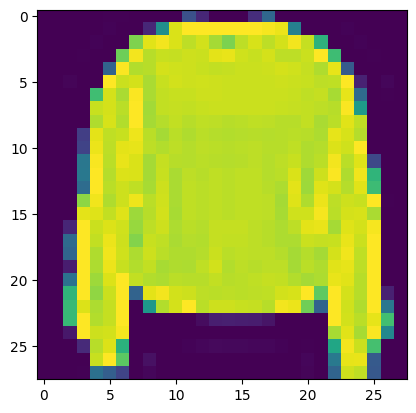

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])
print(train_labels[7])

In [ ]:
torch.unique(torch.from_numpy(train_labels).type(torch.float))

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
# Create a small list so we can index into our training labels so they're human-readable
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

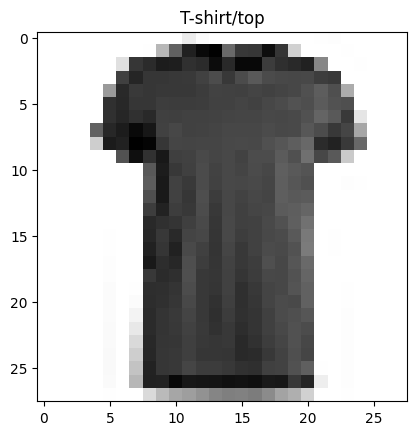

In [ ]:
# Plot an example image and it's label
# imp: here images are grayscaled so we dont need to look at many to get familiar ourself but for unkown colorfull images we ourself should look at amu
index_of_choice=17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary) # colormap = binary for grayscale
plt.title(class_names[train_labels[index_of_choice]])

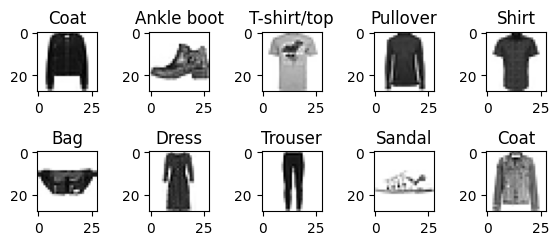

In [ ]:
import random

plt.figure(figsize=(7,7))
for i in range(10):
    ax = plt.subplot(5,5,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.grid(False)
    plt.subplots_adjust(hspace=1)

In [ ]:
range(len(train_data))

range(0, 60000)

In [ ]:
# We can get our training and testing data between 0 an 1 by dividing by maximum
train_data_norm = train_data/ 255.0
test_data_norm = test_data/ 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [ ]:
X_train = torch.from_numpy(train_data_norm).type(torch.float)
y_train = torch.from_numpy(train_labels).type(torch.LongTensor)
X_test = torch.from_numpy(test_data_norm).type(torch.float)
y_test = torch.from_numpy(test_labels).type(torch.LongTensor)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [ ]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
batch_size = 64
train_dataset = TensorDataset(X_train, y_train.type(torch.LongTensor))
test_dataset  = TensorDataset(X_test, y_test.type(torch.LongTensor))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Builting model

input shape of each image is 28 x28

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
# We have to flatten the input : 28 X 28 = 784 or shape (1, 28, 28) --> (1, 784)
class FlattenModel(nn.Module):
    def __init__(self):
        super(FlattenModel, self).__init__()
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        return x
model = FlattenModel()
x = model(torch.Tensor(train_data[0]).unsqueeze(0))
x.shape

torch.Size([1, 784])

In [ ]:
train_data[0].shape


(28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
# In Pytoch crossentorpy we don't need one hot encoding
nn.functional.one_hot(torch.Tensor(train_labels[:10]).to(torch.int64), num_classes=10)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [ ]:
torch.manual_seed(42)
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Tanh(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Tanh(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
    def forward(self, x):
        return self.layer_stack(x)

fashion_mnist_model = FashionMNISTModel(input_shape=784, hidden_units=4, output_shape=10).to(device)

initial_lr = 1e-3
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(fashion_mnist_model.parameters(),
                      lr=0.001,              # equivalent to learning_rate=0.001
                      betas=(0.9, 0.999),    # equivalent to beta_1=0.9 and beta_2=0.999
                      eps=1e-07,             # equivalent to epsilon=1e-07
                      amsgrad=False,         # equivalent to amsgrad=False
                      weight_decay=0.0       # if you don't need weight decay, set to 0.0; otherwise, use your desired value)
)
lr_lambda = lambda epoch: 1 if epoch< 40 else 0.95  **  epoch
# lr = 1e-3 * 10**(epoch/10)
# In PyTorch, since optimizer's lr is already initial_lr, we set:
# lr_factor(epoch) = 10**(epoch/10)
scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

fashion_mnist_model

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=4, bias=True)
    (2): Tanh()
    (3): Linear(in_features=4, out_features=4, bias=True)
    (4): Tanh()
    (5): Linear(in_features=4, out_features=10, bias=True)
  )
)

In [ ]:
fashion_mnist_model(X_train[:10])

tensor([[-0.6114,  0.0250,  0.5453,  0.4771, -0.3814,  0.5148,  0.5295,  0.2286,
          0.1520,  0.0182],
        [-0.5897, -0.0153,  0.5854,  0.4740, -0.3662,  0.5260,  0.5062,  0.2753,
          0.1789,  0.0250],
        [-0.5473,  0.1623,  0.4054,  0.3776, -0.4548,  0.4873,  0.4798,  0.2405,
          0.2179, -0.1124],
        [-0.5564,  0.0935,  0.4683,  0.4367, -0.4202,  0.4919,  0.4949,  0.2684,
          0.1930, -0.0591],
        [-0.4951,  0.0112,  0.5536,  0.4517, -0.3961,  0.4804,  0.4649,  0.3781,
          0.2412, -0.0406],
        [-0.4893,  0.0984,  0.4794,  0.3882, -0.4423,  0.4592,  0.4646,  0.3297,
          0.2600, -0.0964],
        [-0.5459,  0.1381,  0.4242,  0.3770, -0.4405,  0.5095,  0.4621,  0.2604,
          0.2279, -0.1073],
        [-0.4367,  0.0893,  0.5091,  0.3175, -0.4551,  0.4534,  0.4224,  0.3780,
          0.3380, -0.1267],
        [-0.5801,  0.2112,  0.3619,  0.3623, -0.4732,  0.4842,  0.5028,  0.1718,
          0.1941, -0.1213],
        [-0.6400, -

In [ ]:
y_logits = fashion_mnist_model(X_train.to(device))[:5]
y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred_probs

tensor([2, 2, 5, 6, 2])

In [ ]:
y_logits = fashion_mnist_model(X_train.to(device))[:5]
_, preds = torch.max(y_logits, 1)
preds

tensor([2, 2, 5, 6, 2])

In [ ]:
y_train[:5]

tensor([9, 0, 0, 3, 0])

Epoch 1/40 | LR: 0.001000 | Train Loss: 142.6353, Train Acc: 59.1450 | Val Loss: 98.1804, Val Acc: 71.2800
Epoch 3/40 | LR: 0.001000 | Train Loss: 69.5471, Train Acc: 75.8983 | Val Loss: 67.8290, Val Acc: 76.0000
Epoch 5/40 | LR: 0.001000 | Train Loss: 59.2787, Train Acc: 78.7267 | Val Loss: 61.2937, Val Acc: 78.0300
Epoch 7/40 | LR: 0.001000 | Train Loss: 55.4308, Train Acc: 80.4100 | Val Loss: 58.1475, Val Acc: 79.4600
Epoch 9/40 | LR: 0.001000 | Train Loss: 53.2644, Train Acc: 81.8117 | Val Loss: 57.3077, Val Acc: 79.8800
Epoch 11/40 | LR: 0.001000 | Train Loss: 52.0309, Train Acc: 82.5117 | Val Loss: 56.8129, Val Acc: 80.9800
Epoch 13/40 | LR: 0.001000 | Train Loss: 51.3789, Train Acc: 82.6550 | Val Loss: 58.8904, Val Acc: 79.9500
Epoch 15/40 | LR: 0.001000 | Train Loss: 50.6657, Train Acc: 83.0933 | Val Loss: 57.7396, Val Acc: 80.4000
Epoch 17/40 | LR: 0.001000 | Train Loss: 50.2411, Train Acc: 83.0700 | Val Loss: 56.0849, Val Acc: 80.7800
Epoch 19/40 | LR: 0.001000 | Train Loss: 

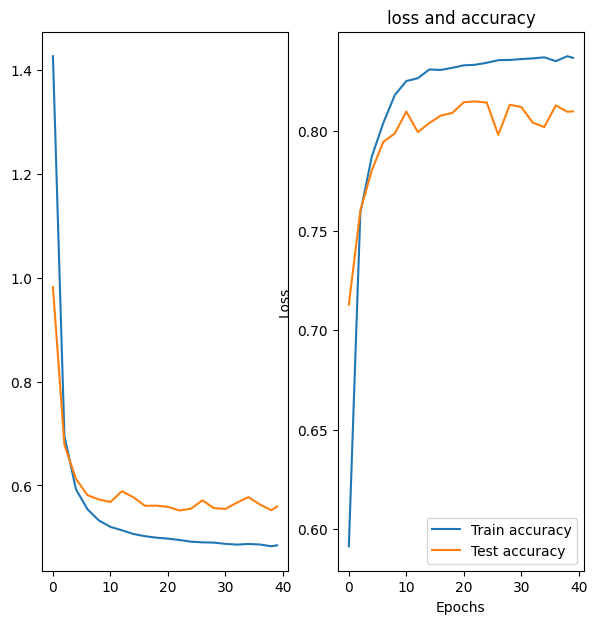

In [ ]:
# fit or train loop
torch.manual_seed(42)
epochs = 40

train_loss_values = []
train_acc_values = []
test_loss_values = []
test_acc_values = []
epoch_count = []

for epoch in range(epochs):
    fashion_mnist_model.train()

    running_loss = 0.0
    running_correct = 0
    total = 0
    #
    # y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # loss = loss_fn(y_logits, y_train) # we use y_logits here because CrossEntropyloss uses softmax internally. os we need raw model output
    # acc = accuracy_fn(y_true=y_train,
    #                   y_pred=y_pred_probs)

    for inputs, labels in train_loader:
      # Move inputs and labels to the device
      inputs, labels = inputs.to(device), labels.to(device)
      y_logits = fashion_mnist_model(inputs)
      loss = loss_fn(y_logits, labels) # no need for softmax crosentropy does it internally.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # Statistics
      running_loss += loss.item() * inputs.size(0)
      _, preds = torch.max(y_logits, 1) #ignore the value. just focus on indices i.e preds
      running_correct += (preds == labels).sum().item()
      total += labels.size(0)

    train_loss = running_loss / total
    train_acc = running_correct / total

    ### Testing
      # Validation phase
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = fashion_mnist_model(inputs)
            loss = loss_fn(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_running_loss/ val_total
    val_acc = val_correct / val_total

    # Print out what's happening
    current_lr = scheduler.get_last_lr()[0]

    if epoch % 2 == 0 or epoch + 1 == epochs:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(val_loss)
        train_acc_values.append(train_acc)
        test_acc_values.append(val_acc)
        print(f"Epoch {epoch+1}/{epochs} | "
        f"LR: {current_lr:.6f} | "
        f"Train Loss: {(100*train_loss):.4f}, Train Acc: {(100*train_acc):.4f} | "
        f"Val Loss: {(100*val_loss):.4f}, Val Acc: {(100*val_acc):.4f}")
    # Step the scheduler at the end of the epoch
    scheduler.step()



# Plot
plt.figure(figsize=(7, 7))
ax_1 = plt.subplot(1, 2, 1)
ax_2 = plt.subplot(1, 2, 2)
ax_1.plot(epoch_count,
         train_loss_values,
         label="Train loss")
ax_1.plot(epoch_count,
         test_loss_values,
         label="Test loss")
ax_2.plot(epoch_count,
         train_acc_values,
         label="Train accuracy")
ax_2.plot(epoch_count,
         test_acc_values,
         label="Test accuracy")
plt.title("loss and accuracy")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### Confusion matrix

In [ ]:
# Make predictions
fashion_mnist_model.eval()
with torch.inference_mode():
    y_logits = fashion_mnist_model(X_test)

# View the first 10 predictions
print(y_logits[:10])

# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_pred=y_preds)}%")

tensor([[ -3.7479,  -5.8218,   0.4887,  -1.1857,  -0.4146,   4.6611,  -2.1694,
           4.3880,   0.2248,   7.0426],
        [  0.5840,  -6.4868,   7.0356,  -1.9230,   3.0911,  -6.4352,   4.8406,
          -5.8621,   1.7507,   1.5862],
        [  1.6419,   9.1200,  -6.9915,   3.5432,  -0.6031,   2.8250,  -0.5007,
          -0.2507,   2.9072, -11.3563],
        [  1.5066,   8.9405,  -7.0907,   3.5807,  -0.7172,   3.0906,  -0.7040,
           0.0938,   2.7728, -10.9547],
        [  2.9100,  -1.5725,   3.3720,   1.7257,   2.2939,  -6.9608,   4.7356,
          -6.2473,   0.8255,  -3.5361],
        [  2.0318,   8.6304,  -5.9635,   3.7082,   0.0173,   1.4213,   0.3801,
          -1.7191,   2.5821, -11.6203],
        [ -1.5706,  -0.4077,   2.8883,   1.9748,   5.4705,  -1.2435,   3.3044,
          -8.9518,  -1.4960,  -5.4059],
        [  1.4895,  -1.4259,   3.4014,   1.6742,   3.3027,  -5.2733,   4.3410,
          -7.1011,   0.1448,  -3.9141],
        [ -3.1447,   1.2088,  -4.3879,   0.8163,

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds)

array([[796,  13,   6,  79,   6,   0,  83,   0,  17,   0],
       [  2, 952,   1,  29,   8,   0,   4,   0,   4,   0],
       [ 20,   1, 612,  14, 246,   0,  80,   0,  27,   0],
       [ 28,  37,   3, 849,  44,   2,  30,   1,   6,   0],
       [  1,   0,  63,  41, 836,   0,  48,   0,  11,   0],
       [  0,   1,   0,   3,   0, 896,   0,  57,  14,  29],
       [177,   9, 121,  64, 215,   0, 378,   1,  35,   0],
       [  0,   0,   0,   0,   0,  35,   0, 940,   0,  25],
       [ 14,   5,  13,   7,   8,   5,  12,   6, 930,   0],
       [  0,   0,   1,   0,   0,  26,   0,  62,   1, 910]])

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix

  n_classes = cm.shape[0]

  # Let's prettify it


  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


# Set labels to the classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])  # setting labels 0 t0 1, as shape[0] is 2

  # Labels the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the labels size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for direction colors
  threshold = (cm.max() + cm.min()) /2.  # give different shades of color respective to how many values are in each box , darker for more value

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size
            )

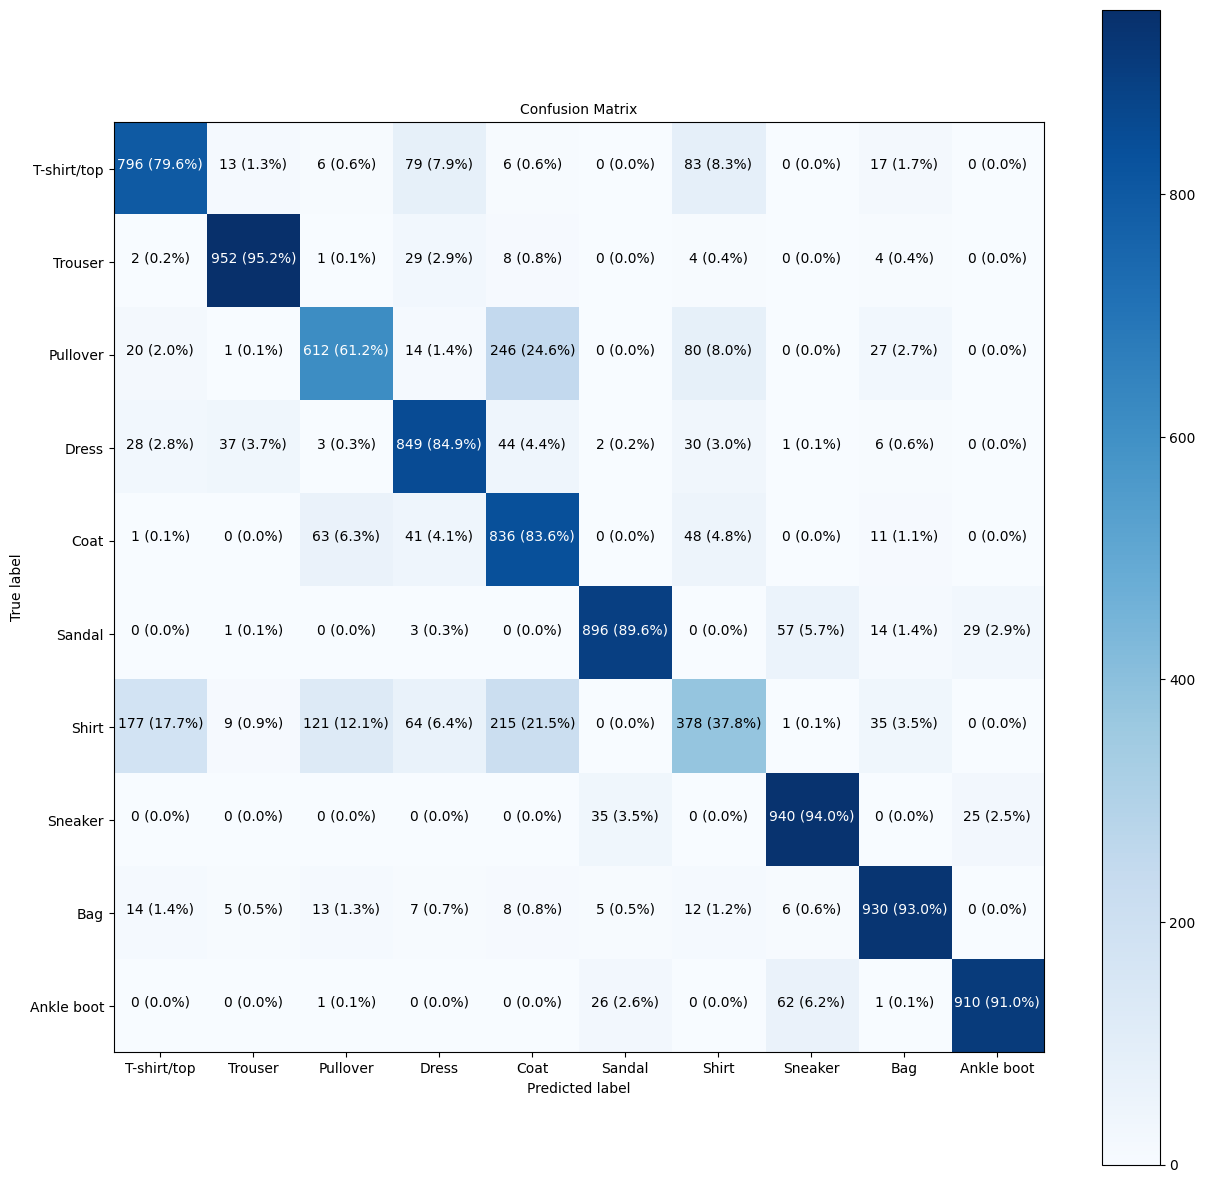

In [ ]:
make_confusion_matrix(y_test, y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10
                      )

### Real testing

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]

  target_image_tensor = torch.from_numpy(target_image).type(torch.float)
  target_image_tensor = target_image_tensor.unsqueeze(0)
  target_image_tensor = target_image_tensor.to(device)

  model.eval()
  with torch.inference_mode():
    y_logits = model(target_image_tensor)
  y_pred_prob = torch.softmax(y_logits, dim=1)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  pred_label = classes[y_pred]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of titles depending on if the predictions is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*np.max(y_pred_prob.numpy()).item(),
                                                   true_label),
             color=color)

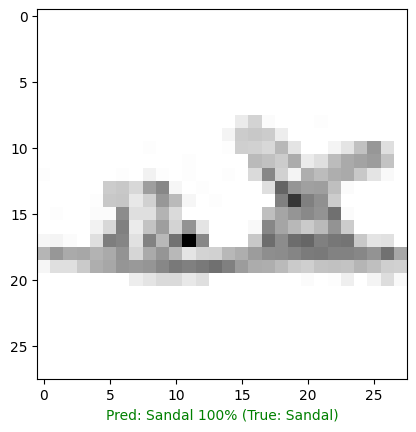

In [ ]:
# Check out a random image as well as it's predictions
plot_random_image(model=fashion_mnist_model,
                  images=test_data_norm, # always make predictions on same kind of data your model is trained
                  true_labels=test_labels,
                  classes=class_names)